In [1]:
import pandas as pd

In [2]:
clicks = pd.read_csv('./datos/clicks.csv')

In [3]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), float64(11), int64(6), object(2)
memory usage: 3.8+ MB


In [4]:
clicks['advertiser_id'].max()

8

In [5]:
clicks['advertiser_id'].min()

0

In [6]:
clicks['advertiser_id'] = clicks['advertiser_id'].astype('category')

In [7]:
clicks = clicks.drop(['action_id'], axis='columns')

In [8]:
clicks['source_id'].max()

10

In [9]:
clicks['source_id'].min()

0

In [10]:
clicks['source_id'] = clicks['source_id'].astype('category')

In [11]:
clicks['created'].head()

0    2019-03-06T22:42:12.755Z
1    2019-03-08T10:24:30.641Z
2    2019-03-08T15:24:16.069Z
3    2019-03-06T03:08:51.543Z
4    2019-03-06T03:32:55.570Z
Name: created, dtype: object

In [12]:
clicks['created'] = pd.to_datetime(clicks['created'])

In [13]:
clicks['country_code'].max()

6333597102633388268

In [14]:
clicks['country_code'].min()

6333597102633388268

In [15]:
clicks = clicks.drop(['country_code'], axis='columns')

In [16]:
clicks['latitude'].head()

0    1.205689
1    1.218924
2    1.205689
3    1.205689
4    1.205689
Name: latitude, dtype: float64

In [17]:
clicks['latitude'] = clicks['latitude'].astype('float32')

In [18]:
clicks['longitude'].head()

0    1.070234
1    1.071209
2    1.070234
3    1.070234
4    1.070234
Name: longitude, dtype: float64

In [19]:
clicks['longitude'] = clicks['longitude'].astype('float32')

In [20]:
clicks['carrier_id'].head()

0     1.0
1     4.0
2     6.0
3    45.0
4    45.0
Name: carrier_id, dtype: float64

In [21]:
clicks['carrier_id'].apply(lambda x: x % 1).sum()

0.0

In [22]:
clicks['carrier_id'].max()

116.0

In [23]:
clicks['carrier_id'].min()

0.0

In [24]:
clicks['carrier_id'].unique()

array([  1.,   4.,   6.,  45.,  27.,  nan,  19.,  18.,   3.,  13.,  24.,
        15.,  10.,  21.,   0.,   9.,  12.,  25.,   5.,  30.,   2.,  29.,
        67.,  14.,  74.,  26.,  75.,  33.,  22.,  28.,  65.,  76.,  11.,
        17.,  91.,  77.,  69.,  93.,  39.,  31., 102., 103., 105., 106.,
        35.,  52.,  59.,  48.,  37., 113.,  55.,  34., 115., 112.,  80.,
       116.])

In [25]:
clicks['carrier_id'] = clicks['carrier_id'].astype('category')

In [26]:
clicks['trans_id'].head()

0    iGgClCM9exiHF4K31g94XmvHEBSLKIY
1    MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM
2    vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU
3    YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM
4    X5XTOcYQovkl6yadYdAD7xioVGU9jiY
Name: trans_id, dtype: object

In [27]:
clicks['trans_id'].unique().size

26351

In [28]:
clicks = clicks.drop(['trans_id'], axis='columns')

In [29]:
clicks['os_minor'].unique().size

29

In [30]:
clicks['os_minor'].unique()

array([6.76813741e+18, 3.02521945e+18, 5.97565607e+18, 3.37863995e+18,
                  nan, 6.39156710e+18, 7.55367603e+18, 6.66662581e+17,
       3.51153782e+18, 3.87570706e+18, 3.39996160e+18, 6.38096315e+18,
       3.13860584e+18, 8.50225519e+18, 4.21339124e+18, 3.17802727e+18,
       7.72856597e+18, 8.61372192e+18, 4.10688972e+18, 7.20901744e+18,
       5.47606382e+18, 4.46389214e+18, 2.45575206e+18, 9.08108195e+18,
       4.20691218e+18, 9.17554878e+17, 6.42365938e+18, 7.83746445e+18,
       7.69994994e+18])

In [31]:
clicks = clicks.drop(['os_minor'], axis='columns')

In [32]:
clicks = clicks.drop(['agent_device'], axis='columns')

In [33]:
clicks['os_major'].unique()

array([3.07284934e+18, 1.77408510e+18, 4.56645391e+18,            nan,
       7.45240570e+18, 1.56383029e+18, 5.74580514e+18, 6.69357851e+18,
       7.49973195e+18, 2.83531211e+18, 4.07221146e+18, 7.43648083e+17,
       6.92818305e+18])

In [34]:
clicks = clicks.drop(['os_major'], axis='columns')

In [35]:
clicks = clicks.drop(['specs_brand'], axis='columns')

In [36]:
clicks['brand'].unique()

array([nan,  1.,  3.,  4.,  2.,  0.,  6.,  9.,  5.,  7.,  8., 13., 10.,
       12.])

In [37]:
clicks['brand'] = clicks['brand'].astype('category')

In [38]:
clicks['timeToClick'].head()

0     1.563
1       NaN
2       NaN
3    19.013
4    28.110
Name: timeToClick, dtype: float64

In [39]:
clicks['timeToClick'] = clicks['timeToClick'].astype('float32')

In [40]:
clicks['touchX'].head()

0    0.905
1      NaN
2    0.946
3    0.035
4    0.054
Name: touchX, dtype: float64

In [41]:
clicks['touchX'] = clicks['touchX'].astype('float32')

In [42]:
clicks['touchY'].head()

0    0.078
1      NaN
2    0.473
3    0.431
4    0.423
Name: touchY, dtype: float64

In [43]:
clicks['touchY'] = clicks['touchY'].astype('float32')

In [44]:
clicks['ref_type'].unique()

array([1891515180541284343, 1494519392962156891, 5016171802147987303,
       6323871695571587575])

In [45]:
clicks['ref_type'].value_counts()

1891515180541284343    25549
1494519392962156891      739
5016171802147987303       58
6323871695571587575        5
Name: ref_type, dtype: int64

In [46]:
clicks['ref_type'] = clicks['ref_type'].astype('category')

In [47]:
clicks['ref_hash'].max()

9221118223027605174

In [48]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 13 columns):
advertiser_id      26351 non-null category
source_id          26351 non-null category
created            26351 non-null datetime64[ns, UTC]
latitude           26351 non-null float32
longitude          26351 non-null float32
wifi_connection    26351 non-null bool
carrier_id         26340 non-null category
brand              6235 non-null category
timeToClick        22977 non-null float32
touchX             23011 non-null float32
touchY             23011 non-null float32
ref_type           26351 non-null category
ref_hash           26351 non-null int64
dtypes: bool(1), category(5), datetime64[ns, UTC](1), float32(5), int64(1)
memory usage: 1.1 MB


In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
clicks['created'].max()

Timestamp('2019-03-13 23:59:59.298000+0000', tz='UTC')

In [51]:
clicks['created'].min()

Timestamp('2019-03-05 01:17:30.663000+0000', tz='UTC')

In [52]:
clicks['hour'] = clicks['created'].dt.hour
clickTimePerHour = clicks['timeToClick'].groupby(clicks['hour']).mean().values

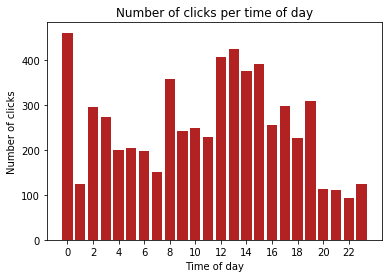

In [53]:
plt.bar(range(24), clickTimePerHour, color='firebrick')
plt.xticks(np.arange(0, 24, 2))
plt.xlabel('Time of day')
plt.ylabel('Number of clicks')
plt.title('Number of clicks per time of day')
plt.savefig('./images/Number of clicks per time of day.png', dpi=200)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


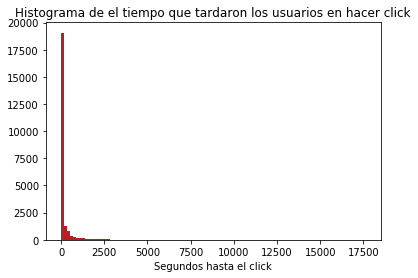

In [54]:
times = clicks['timeToClick'].values
plt.hist(times, bins=100, color='firebrick')
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click')
plt.savefig('./images/timesToClick.png', dpi=200)

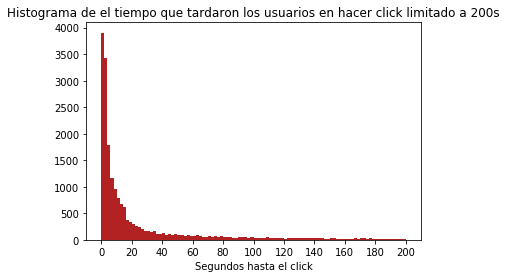

In [55]:
plt.hist(times, bins=100, range=(0, 200), color='firebrick')
plt.xticks(np.arange(0, 220, 20))
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click limitado a 200s')
plt.savefig('./images/timesToClick2.png', dpi=200)

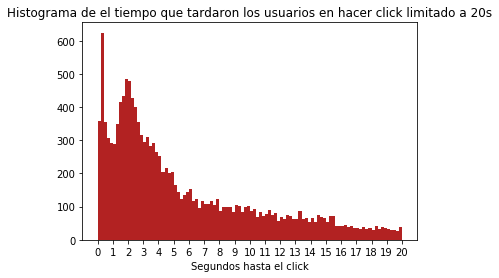

In [56]:
plt.hist(times, bins=100, range=(0, 20), color='firebrick')
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click limitado a 20s')
plt.savefig('./images/timesToClick3.png', dpi=200)

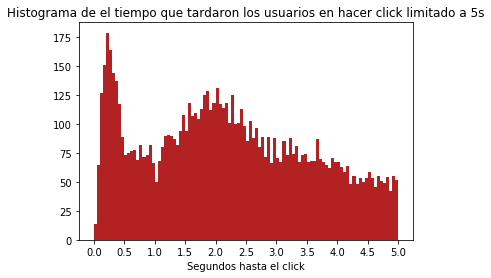

In [59]:
plt.hist(times, bins=100, range=(0, 5), color='firebrick')
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click limitado a 5s')
plt.savefig('./images/timesToClick4.png', dpi=200)

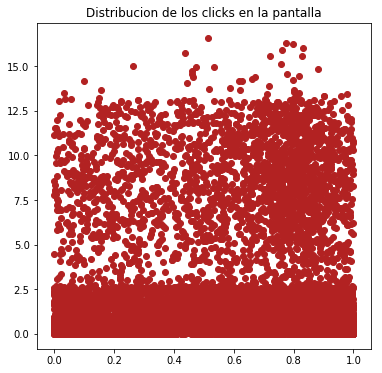

In [60]:
plt.figure(figsize=(6, 6))
plt.scatter(clicks['touchX'].values, clicks['touchY'].values, color='firebrick')
plt.title('Distribucion de los clicks en la pantalla')
plt.savefig('./images/clicksDistribution.png', dpi=200)